<table align="left"  width="100%"> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="..\images\qworld.jpg" width="35%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by Maksim Dimitrijev (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>) and Aurél Gábris
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\qgate}[1]{ \mathop{\textit{#1} } }$

<h1> Multiqubit operations </h1>

In this notebook we will cover all two- and three-qubit operations of Qiskit.

Remember that Qiskit combines qubits in descending order of indices, as $\cdots$qreg[2]$\otimes$qreg[1]$\otimes$qreg[0].

<h2>Two Qubit Gates</h2>

The two qubit gates we will talk about are controlled operations except the $\qgate{SWAP}$ gate. 

<h3>$\qgate{SWAP}$ gate</h3>

This is the only two-qubit gate, that does not represent controlled operation. $\qgate{SWAP}$ simply exchanges the two qubits. Matrix form of the operation is the following:

$$
    \qgate{SWAP} = \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1} .
$$

Operation can be described in the following way:
<ul>
    <li>$ \qgate{SWAP} \ket{00} = \ket{00} $, </li>
    <li>$ \qgate{SWAP} \ket{01} = \ket{10} $, </li>
    <li>$ \qgate{SWAP} \ket{10} = \ket{01}$, </li>
    <li>$ \qgate{SWAP} \ket{11} = \ket{11}$. </li>
</ul>

The syntax of $\qgate{SWAP}$ gate is the following:

$$
qc.swap(first\_qubit, second\_qubit).
$$

{'01': 478, '00': 522}


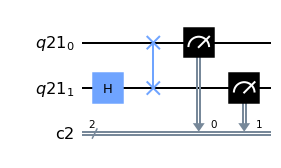

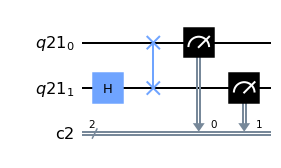

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
qreg =  QuantumRegister(2)
creg = ClassicalRegister(2)
mycircuit = QuantumCircuit(qreg,creg)

mycircuit.h(qreg[1])
mycircuit.swap(qreg[1],qreg[0])

mycircuit.measure(qreg,creg)

job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(mycircuit)
print(counts)
mycircuit.draw(output='mpl')

<h3> Task 1 </h3>

Suppose that our quantum computer has architecture like Melbourne device seen on picture. Connections between numbers of qubits show between which qubits controlled operations and $\qgate{SWAP}$ are allowed.

Perform Hadamard operation on qubit 0 and swap it sequentially to qubit 8, and perform a $\qgate{CNOT}$ operation with qubit 7.

<img src="../images/10_ibmq_systems.jpg" width="75%">

{'00000000000000': 501, '00000010000001': 499}


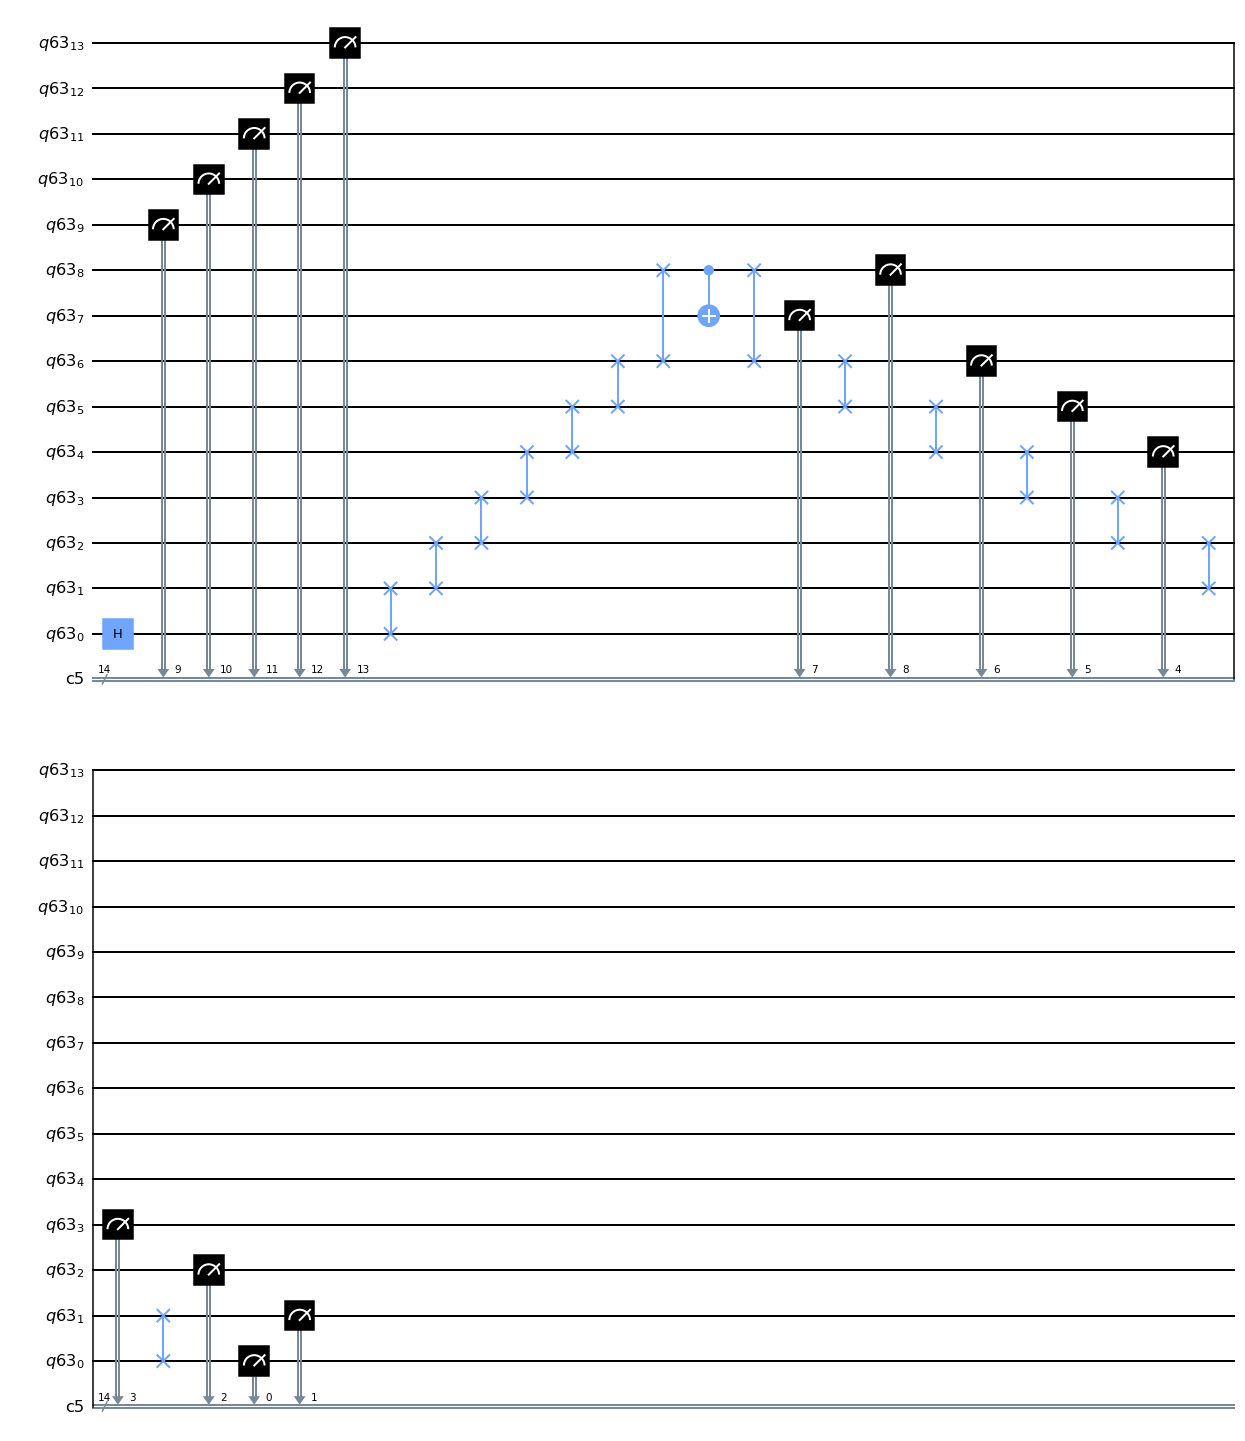

In [6]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
qreg =  QuantumRegister(14)
creg = ClassicalRegister(14)
mycircuit = QuantumCircuit(qreg,creg)

mycircuit.h(qreg[0])

for i in range(0, 6):
    mycircuit.swap(qreg[i], qreg[i+1])
mycircuit.swap(qreg[6],qreg[8])
mycircuit.cx(qreg[8],qreg[7])
mycircuit.swap(qreg[6],qreg[8])
mycircuit.swap(qreg[5],qreg[6])
mycircuit.swap(qreg[4],qreg[5])
mycircuit.swap(qreg[3],qreg[4])
mycircuit.swap(qreg[2],qreg[3])
mycircuit.swap(qreg[1],qreg[2])
mycircuit.swap(qreg[0],qreg[1])
mycircuit.measure(qreg,creg)

mycircuit.draw(output='mpl', reverse_bits=True)

job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(mycircuit)
print(counts)

<a href="C09_Multiqubit_Operations_Solutions.ipynb#task1">click for our solution</a>

Now we move on to the controlled operations. In case of the controlled operations, one qubit acts as the control, and if it is in state $\ket{1}$, then the operation is performed on the target qubit.

<h3>Controlled Pauli Gates</h3>

For each of Pauli operations ($\qgate{X}$, $\qgate{Y}$, $\qgate{Z}$) we have controlled version of the operation.

<h3>Controlled-$\qgate{X}$ (${\qgate{CNOT}}$)</h3>

If control qubit is in state $\ket{1}$, then $\qgate{X}$ is applied to the target qubit. Matrix form of the operation is the following:

$$
   {\qgate{CNOT}} = \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} .
$$

Operation can be described in the following way:
<ul>
    <li>$ \qgate{CNOT} \ket{00} = \ket{00} $, </li>
    <li>$ \qgate{CNOT} \ket{01} = \ket{01} $, </li>
    <li>$ \qgate{CNOT} \ket{10} = \ket{11} $, </li>
    <li>$ \qgate{CNOT} \ket{11} = \ket{10} $. </li>
</ul>

The syntax of gate $\qgate{CNOT}$ is the following:

$$
qc.cx(control\_qubit, target\_qubit).
$$

{'01': 1000}


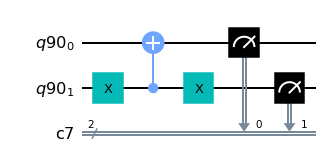

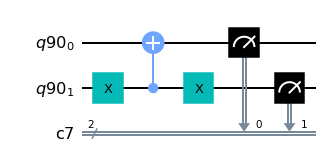

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
qreg =  QuantumRegister(2)
creg = ClassicalRegister(2)
mycircuit = QuantumCircuit(qreg,creg)

mycircuit.x(qreg[1])
mycircuit.cx(qreg[1],qreg[0])
mycircuit.x(qreg[1])

mycircuit.measure(qreg,creg)

job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(mycircuit)
print(counts)
mycircuit.draw(output='mpl')

<h3>Controlled-$\qgate{Y}$</h3>

If control qubit is in state $\ket{1}$, then $Y$ is applied to the target qubit. Matrix form of the operation is the following:

$$
    \qgate{CY} = \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & -i \\ 0 & 0 & i & 0} .
$$

Operation can be described in the following way:
<ul>
    <li>$ \qgate{CY} \ket{00} = \ket{00} $, </li>
    <li>$ \qgate{CY} \ket{01} = \ket{01} $, </li>
    <li>$ \qgate{CY} \ket{10} = i\ket{11} $, </li>
    <li>$ \qgate{CY} \ket{11} = -i\ket{10} $. </li>
</ul>

The syntax of gate $\qgate{CY}$ is the following:

$$
qc.cy(control\_qubit, target\_qubit).
$$

[0.+0.j 0.+0.j 0.-0.j 0.+1.j]


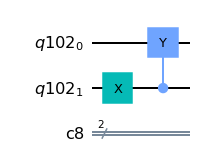

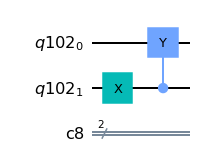

In [9]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
qreg =  QuantumRegister(2)
creg = ClassicalRegister(2)
mycircuit = QuantumCircuit(qreg,creg)

mycircuit.x(qreg[1])
mycircuit.cy(qreg[1],qreg[0])

job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)
print(current_quantum_state)
mycircuit.draw(output='mpl')

<h3>Controlled-$\qgate{Z}$</h3>

If control qubit is in state $\ket{1}$, then $\qgate{Z}$ is applied to the target qubit. Matrix form of the operation is the following:

$$
    \qgate{CZ} = \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1} .
$$

Operation can be described in the following way:
<ul>
    <li>$ \qgate{CZ} \ket{00} = \ket{00} $, </li>
    <li>$ \qgate{CZ} \ket{01} = \ket{01} $, </li>
    <li>$ \qgate{CZ} \ket{10} = \ket{10} $, </li>
    <li>$ \qgate{CZ} \ket{11} = -\ket{11} $. </li>
</ul>

The syntax of gate $\qgate{CZ}$ is the following:

$$
qc.cz(control\_qubit, target\_qubit).
$$

[ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]


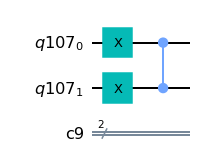

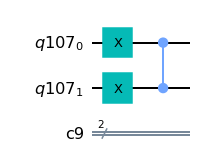

In [10]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
qreg =  QuantumRegister(2)
creg = ClassicalRegister(2)
mycircuit = QuantumCircuit(qreg,creg)

mycircuit.x(qreg[1])
mycircuit.x(qreg[0])
mycircuit.cz(qreg[1],qreg[0])

job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)
print(current_quantum_state)
mycircuit.draw(output='mpl')

<h3>Controlled Hadamard</h3>

If control qubit is in state $\ket{1}$, then $\qgate{H}$ is applied to the target qubit. Matrix form of the operation is the following:

$$
    \qgate{CH} = \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ 0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} .
$$

Operation can be described in the following way:
<ul>
    <li>$ \qgate{CH} \ket{00} = \ket{00} $, </li>
    <li>$ \qgate{CH} \ket{01} = \ket{01} $, </li>
    <li>$ \qgate{CH} \ket{10} = \frac{1}{\sqrt{2}} \ket{10} + \frac{1}{\sqrt{2}} \ket{11}$, </li>
    <li>$ \qgate{CH} \ket{11} = \frac{1}{\sqrt{2}} \ket{10} - \frac{1}{\sqrt{2}} \ket{11}$. </li>
</ul>

The syntax of gate $\qgate{CH}$ is the following:

$$
qc.ch(control\_qubit, target\_qubit).
$$

{'11': 498, '10': 502}


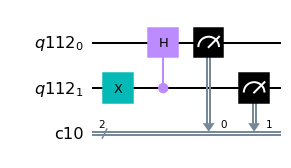

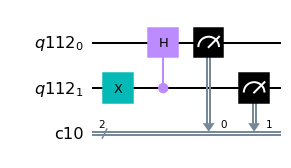

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
qreg =  QuantumRegister(2)
creg = ClassicalRegister(2)
mycircuit = QuantumCircuit(qreg,creg)

mycircuit.x(qreg[1])
mycircuit.ch(qreg[1],qreg[0])

mycircuit.measure(qreg,creg)

job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(mycircuit)
print(counts)
mycircuit.draw(output='mpl')

<h3>Controlled rotation around $z$-axis</h3>

If control qubit is in state $\ket{1}$, then rotation around $z$-axis is applied to the target qubit. Matrix form of the operation is the following:

$$
    \qgate{CRZ}(\lambda) = \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & e^{-i\lambda/2} & 0 \\ 0 & 0 & 0 & e^{i\lambda/2}} .
$$

Operation can be described in the following way:
<ul>
    <li>$ \qgate{CRZ}(\lambda) \ket{00} = \ket{00} $, </li>
    <li>$ \qgate{CRZ}(\lambda) \ket{01} = \ket{01} $, </li>
    <li>$ \qgate{CRZ}(\lambda) \ket{10} = e^{-i\lambda/2} \ket{10}$, </li>
    <li>$ \qgate{CRZ}(\lambda) \ket{11} = e^{i\lambda/2} \ket{11}$. </li>
</ul>

The syntax of gate $\qgate{CRZ}(\lambda)$ is the following (angle $\lambda$ in radians):

$$
qc.crz(\lambda, control\_qubit, target\_qubit).
$$

[0.        +0.j         0.        +0.j         0.70710678-0.70710678j
 0.        +0.j        ]


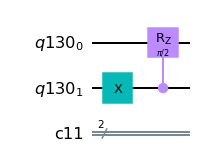

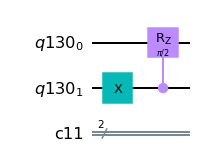

In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi
qreg =  QuantumRegister(2)
creg = ClassicalRegister(2)
mycircuit = QuantumCircuit(qreg,creg)

mycircuit.x(qreg[1])
mycircuit.crz(pi/2,qreg[1],qreg[0])

job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)
print(current_quantum_state)
mycircuit.draw(output='mpl')

<h3>Controlled phase rotation</h3>

If both qubits are in state $\ket{11}$, then phase rotation is performed. Matrix form of the operation is the following:

$$
    \qgate{CP}(\lambda) = \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\lambda}} .
$$

Operation can be described in the following way:
<ul>
    <li>$ \qgate{CP}(\lambda) \ket{00} = \ket{00} $, </li>
    <li>$ \qgate{CP}(\lambda) \ket{01} = \ket{01} $, </li>
    <li>$ \qgate{CP}(\lambda) \ket{10} = \ket{10}$, </li>
    <li>$ \qgate{CP}(\lambda) \ket{11} = e^{i\lambda} \ket{11}$. </li>
</ul>

The syntax of gate $\qgate{CP}(\lambda)$ is the following (angle $\lambda$ in radians):

$$
qc.cp(\lambda, control\_qubit, target\_qubit).
$$

[0.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j 6.123234e-17+1.j]


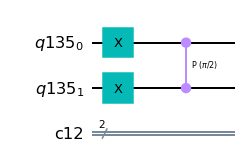

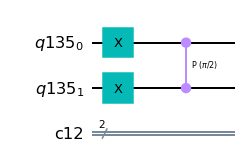

In [13]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi
qreg =  QuantumRegister(2)
creg = ClassicalRegister(2)
mycircuit = QuantumCircuit(qreg,creg)

mycircuit.x(qreg[1])
mycircuit.x(qreg[0])
mycircuit.cp(pi/2,qreg[1],qreg[0])

job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)
print(current_quantum_state)
mycircuit.draw(output='mpl')

<h3>Controlled $\qgate{U}$ rotation</h3>

If control qubit is in state $\ket{1}$, then rotation $\qgate{U}$ is applied to the target qubit. Matrix form of the operation is the following:

$$
    \qgate{CU}(\theta, \phi, \lambda, \gamma) = 
    \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 
                    0 & 1 & 0 & 0 \\
                    0 & 0 & e^{i \gamma}\cos{\frac{\theta}{2}} & -e^{i(\gamma + \lambda)}\sin{\frac{\theta}{2}} \\ 
    0 & 0 & e^{i(\gamma + \phi)}\sin{\frac{\theta}{2}} & e^{i(\gamma + \phi + \lambda )}\cos{\frac{\theta}{2}}} .
$$

Operation can be described in the following way:
<ul>
    <li>$ \qgate{CU}(\theta, \phi, \lambda, \gamma) \ket{00} = \ket{00} $, </li>
    <li>$ \qgate{CU}(\theta, \phi, \lambda, \gamma) \ket{01} = \ket{01} $, </li>
    <li>$ \qgate{CU}(\theta, \phi, \lambda, \gamma) \ket{10} = e^{i \gamma }\cos{\frac{\theta}{2}} \ket{10} + e^{i(\gamma + \phi)}\sin{\frac{\theta}{2}} \ket{11}$, </li>
    <li>$ \qgate{CU}(\theta, \phi, \lambda, \gamma) \ket{11} = -e^{i(\gamma + \lambda)}\sin{\frac{\theta}{2}} \ket{10} + e^{i(\gamma + \phi + \lambda)}\cos{\frac{\theta}{2}} \ket{11}$. </li>
</ul>

The syntax of gate $\qgate{CU}(\theta, \phi, \lambda, \gamma)$ is the following (angles $\theta, \phi,
\lambda, \gamma$ are in radians):

$$
qc.cu(\theta, \phi, \lambda, \gamma, control\_qubit, target\_qubit).
$$

[0.00000000e+00+0.j         0.00000000e+00+0.j
 7.07106781e-01+0.j         4.32978028e-17+0.70710678j]


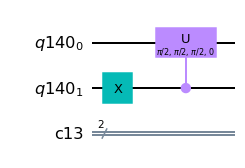

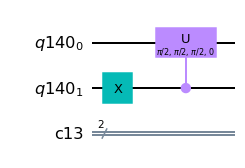

In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi
qreg =  QuantumRegister(2)
creg = ClassicalRegister(2)
mycircuit = QuantumCircuit(qreg,creg)

mycircuit.x(qreg[1])
mycircuit.cu(pi/2,pi/2,pi/2,0,qreg[1],qreg[0])

job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)
print(current_quantum_state)
mycircuit.draw(output='mpl')

<h3> Global phase and controlled operations </h3>


We have seen that an overall complex phase factor $e^{i\delta}$, called *global phase*, can be dropped or inserted into the mathematical expressions for quantum states $\ket{\psi}$. In the previous sections we have also observed that an overall multiplication of single qubit rotations are also irrelevant. For example, the phase gate,

$$
\qgate{P}(\lambda) = \mymatrix{rr}{1 & 0 \\ 0& e^{i\lambda} }
$$
and the $z$-rotation gate
$$
\qgate{RZ}(\lambda) = \mymatrix{rr}{ e^{-i\lambda/2} & 0 \\ 0& e^{i\lambda/2} }
$$
are related to each other as
$$
    \qgate{P}(\lambda) = e^{i\lambda/2} \qgate{RZ}(\lambda),
$$
and lead to the same rotation on the Bloch sphere.
 
We might think that their controlled versions, $\qgate{CRZ}$ and $\qgate{CP}$ will also lead to the same operations:

In [15]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi
lambda_angle = pi/4

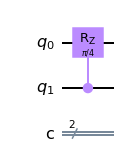

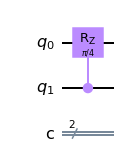

In [16]:
circuit1 = QuantumCircuit(2,2)
circuit1.crz(lambda_angle,1,0)
circuit1.draw(output='mpl')

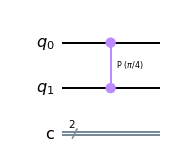

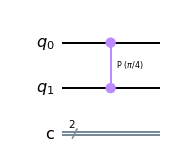

In [17]:
circuit2 = QuantumCircuit(2,2)
circuit2.cp(lambda_angle, 1,0)
circuit2.draw(output='mpl')

These two controlled gates are, however, not equivalent. We can tell this immediately, by considering the effect of swapping the two qubits.

Let $\qgate{CRZ}'(\lambda) := \qgate{SWAP} \qgate{CRZ}(\lambda) \qgate{SWAP}$ and $\qgate{CP}'(\lambda) := \qgate{SWAP} \qgate{CP}(\lambda) \qgate{SWAP}$. Then the basis states will be mapped as
<ul>
    <li>$ \qgate{CRZ}'(\lambda) \ket{00} = \ket{00} $, </li>
    <li>$ \qgate{CRZ}'(\lambda) \ket{01} = e^{-i\lambda/2} \ket{01} $, </li>
    <li>$ \qgate{CRZ}'(\lambda) \ket{10} = \ket{10}$, </li>
    <li>$ \qgate{CRZ}'(\lambda) \ket{11} = e^{i\lambda/2} \ket{11}$,</li>
</ul>
and
<ul>
    <li>$ \qgate{CP}'(\lambda) \ket{00} = \ket{00} $, </li>
    <li>$ \qgate{CP}'(\lambda) \ket{01} = \ket{01} $, </li>
    <li>$ \qgate{CP}'(\lambda) \ket{10} = \ket{10}$, </li>
    <li>$ \qgate{CP}'(\lambda) \ket{11} = e^{i\lambda} \ket{11}$. </li>
</ul>
We see that while the effect of $RZ$ changes, the effect of $\qgate{CP}$ stays the same if we swap the two qubits. This latter property is reflected also in the quantum circuit notation: it is denoted by symmetric symbol. 

How the two gates $\qgate{CRZ}$ and $\qgate{CP}$ are related to each other? It turns out that this is very simple: the difference is just a single $\qgate{P}(\lambda/2)$ on the *control* qubit. Let us consider the quantum circuit depicted below.

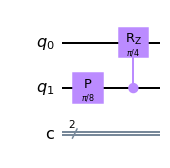

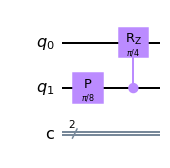

In [18]:
circuit3 = QuantumCircuit(2,2)
circuit3.p(lambda_angle/2,1)
circuit3.crz(lambda_angle,1,0)
circuit3.draw(output='mpl')

The effect of this circuit on the basis states can be computed:
<ul>
    <li>$ \qgate{CRZ}(\lambda) (\qgate{P}(\lambda) \otimes I) \ket{00} = \qgate{CRZ}(\lambda) \ket{00} = \ket{00} $, </li>
    <li>$ \qgate{CRZ}(\lambda) (\qgate{P}(\lambda) \otimes I) \ket{01} = \qgate{CRZ}(\lambda) \ket{01} = \ket{01} $, </li>
    <li>$ \qgate{CRZ}(\lambda) (\qgate{P}(\lambda) \otimes I) \ket{10} = \qgate{CRZ}(\lambda) e^{i\lambda/2} \ket{10} =  e^{i\lambda/2}  \qgate{CRZ}(\lambda)\ket{10} =\ket{10}$, </li>
    <li>$ \qgate{CRZ}(\lambda) (\qgate{P}(\lambda) \otimes I) \ket{11} = \qgate{CRZ}(\lambda) e^{i\lambda/2} \ket{11} = e^{i\lambda/2} \qgate{CRZ}(\lambda) \ket{11} =e^{i\lambda} \ket{11}$, </li>
</ul>
and is the same as the effect of the $\qgate{CP}(\lambda)$ gate. We can also convince ourselves that the order of $\qgate{CRZ}$ and $\qgate{P}$ does not make any difference, i.e. we can shift the $\qgate{P}$ gate left-right along the quantum wire.

Will this phase ever make a difference in the measurement statistics? The code below shows an example where it indeed does! The above relation to the single qubit phase $\qgate{P}$ can help us to understanding why.

Checking CRZ gate


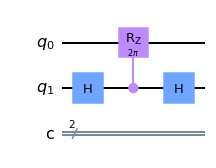

00 🠖 {'10': 1024}
01 🠖 {'11': 1024}
10 🠖 {'00': 1024}
11 🠖 {'01': 1024}


---------------------------------
Checking CP gate


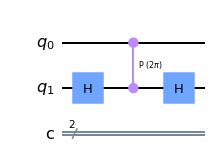

00 🠖 {'00': 1024}
01 🠖 {'01': 1024}
10 🠖 {'10': 1024}
11 🠖 {'11': 1024}


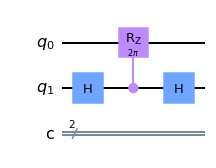

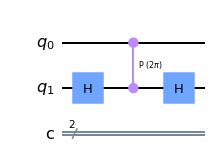

In [19]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

def check_controlled_gate_phase(cgate):
    for i in range(4):
        circuit4 = QuantumCircuit(2,2)
        if (i&1)==1: circuit4.x(0)
        if ((i>>1)&1)==1: circuit4.x(1)
        
        lambda_angle=2*pi

        circuit4.h(1)
        if (cgate=='crz'):
            circuit4.crz(lambda_angle, 1,0)
        if (cgate=='cp'):
            circuit4.cp(lambda_angle, 1,0)
        circuit4.h(1)
      
        if i==0:
            display(circuit4.draw(output='mpl'))
    
        circuit4.measure([0,1], [0,1])
    
        job = execute(circuit4, Aer.get_backend('qasm_simulator'),shots=1024)
        print(format(i,"02b"),"🠖", job.result().get_counts(circuit4))


print("Checking CRZ gate")
check_controlled_gate_phase('crz')

print("\n\n---------------------------------")
print("Checking CP gate")
check_controlled_gate_phase('cp')

<h3> Task 2 </h3>

Construct the $\qgate{CP}$ gate in a circuit using the $\qgate{RZ}$ gate and the $\qgate{P}$ gate.

In [ ]:

# Your solution here


<a href="C09_Multiqubit_Operations_Solutions.ipynb#task2">click for our solution</a>

<h2>Three Qubit Gates</h2>



<h3>Toffoli gate ($\qgate{CCX}$ gate)</h3>

This gate has two control qubits, and if both are in state $\ket{1}$, then $X$ is applied to the target qubit. Matrix form of the operation is the following:

$$
    \qgate{CCX} = \mymatrix{cccccccc}{1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0} .
$$

Operation can be described in the following way:
<ul>
    <li>$ \qgate{CCX} \ket{000} = \ket{000}$, </li>
    <li>$ \qgate{CCX} \ket{001} = \ket{001}$, </li>
    <li>$ \qgate{CCX} \ket{010} = \ket{010}$, </li>
    <li>$ \qgate{CCX} \ket{011} = \ket{011}$, </li>
    <li>$ \qgate{CCX} \ket{100} = \ket{100}$, </li>
    <li>$ \qgate{CCX} \ket{101} = \ket{101}$, </li>
    <li>$ \qgate{CCX} \ket{110} = \ket{111}$, </li>
    <li>$ \qgate{CCX} \ket{111} = \ket{110}$. </li>
</ul>

The syntax of $\qgate{CCX}$ gate is the following:

$$
qc.ccx(control\_qubit1, control\_qubit2, target\_qubit).
$$

{'111': 1000}


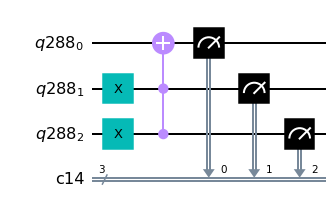

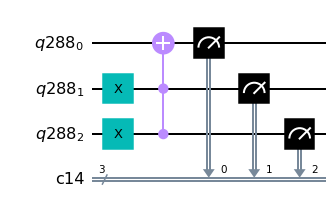

In [20]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
qreg =  QuantumRegister(3)
creg = ClassicalRegister(3)
mycircuit = QuantumCircuit(qreg,creg)

mycircuit.x(qreg[2])
mycircuit.x(qreg[1])
mycircuit.ccx(qreg[2],qreg[1],qreg[0])

mycircuit.measure(qreg,creg)

job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(mycircuit)
print(counts)
mycircuit.draw(output='mpl')

<h3>Fredkin gate (controlled $\qgate{SWAP}$ gate)</h3>

This gate has one control qubit, and if it is in state $\ket{1}$, then SWAP operation is applied to both target qubits. Matrix form of the operation is the following:

$$
    \qgate{CSWAP} = \mymatrix{cccccccc}{1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1} .
$$

Operation can be described in the following way:
<ul>
    <li>$ \qgate{CSWAP} \ket{000} = \ket{000}$, </li>
    <li>$ \qgate{CSWAP} \ket{001} = \ket{001}$, </li>
    <li>$ \qgate{CSWAP} \ket{010} = \ket{010}$, </li>
    <li>$ \qgate{CSWAP} \ket{011} = \ket{011}$, </li>
    <li>$ \qgate{CSWAP} \ket{100} = \ket{100}$, </li>
    <li>$ \qgate{CSWAP} \ket{101} = \ket{110}$, </li>
    <li>$ \qgate{CSWAP} \ket{110} = \ket{101}$, </li>
    <li>$ \qgate{CSWAP} \ket{111} = \ket{111}$. </li>
</ul>

The syntax of $\qgate{CSWAP}$ gate is the following:

$$
qc.cswap(control\_qubit, target\_qubit1, target\_qubit2).
$$

{'100': 487, '011': 513}


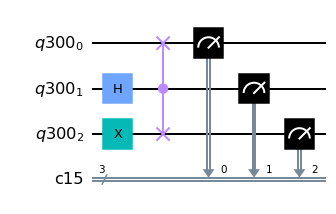

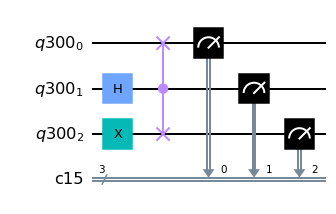

In [21]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
qreg =  QuantumRegister(3)
creg = ClassicalRegister(3)
mycircuit = QuantumCircuit(qreg,creg)

mycircuit.x(qreg[2])
mycircuit.h(qreg[1])
mycircuit.cswap(qreg[1],qreg[2],qreg[0])

mycircuit.measure(qreg,creg)

job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(mycircuit)
print(counts)
mycircuit.draw(output='mpl')

<h3> Task 3 </h3>

Create a method named `fredkin` and implement Fredkin gate using $\qgate{CNOT}$ and $\qgate{CCNOT}$ operators. Use unitary simulator to check the unitary matrix corresponding to your circuit. (Follow the Qiskit order.)

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

def fredkin():
    circuit = QuantumCircuit(3)
    
    #
    # Your code here
    #
    
    return circuit

In [ ]:
circuit = fredkin()

job = execute(circuit,Aer.get_backend('unitary_simulator'),shots=1)
u=job.result().get_unitary(circuit,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

circuit.draw(output="mpl")

<a href="C09_Multiqubit_Operations_Solutions.ipynb#task3">click for our solution</a>